

# Project: Investigating the TMDb movie data dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 

> In this project we will be analysing the tmdb-movies dataset (tmdb-movies.csv), this data set contains information about 10,000 movies collected from The Movie Database (TMDb) with 21 columns filled with different informations about the movies. This dataset was assembled to answer most of the questions posed by the film industry (is there a consistent formula to predict if the movie will be successful ?

> The column are : <ul>
    <li><b>id</b>
    <li><b>imdb_id:</b> the id of the movie in imdb website
    <li><b>popularity:</b> cumulative decided by number of star ratings, is a very important metric here on TMDB. It helps us boost search results
    <li><b>budget:</b> budget of the movie before the inflation
    <li><b>revenue:</b> revenue of the movie before the inflation
    <li><b>original_title</b>
    <li><b>cast:</b> the actors
    <li><b>homepage:</b> url for the homepage of the movie
    <li><b>director:</b> director name
    <li><b>tagline:</b> famous tagline of the movie
    <li><b>keywords:</b> keywords that describe the movie
    <li><b>overview:</b> an brief overview of the movie (plot)
    <li><b>runtime:</b> the length of the film plus the length of the ending credits
    <li><b>genres:</b> categories that define films based on narrative or stylistic elements
    <li><b>production_companies</b>
    <li><b>release_date</b>
    <li><b>vote_count:</b> number of votes/ratings of the movie on imdb
    <li><b>vote_average:</b> a vote out of 10 (10 being the highest - 0 is the lowest)
    <li><b>release_year</b>
    <li><b>budget_adj:</b> the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time
    <li><b>revenue_adj:</b> the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time
        
## Question(s) for Analysis
> Questions asked: <ul>
    <li>Which genres are most popular from year to year?
    <li>What kinds of properties are associated with movies that have high profit?
    <li>Are movie with higher budget profitable?
    <li>Do movie with higher budget recieve better ratting?
                    


In [133]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

In [134]:
# Loading the data 

df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [135]:
#Checking for the numbers of rows:10866 , columns:21
df.shape

(10866, 21)

In [136]:
#Cheaking datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [137]:
# Identifying the columns with missing values, and the number of rows with missing values
print(df.isnull().sum())
print("\n \n")
print("The name of the columns with missing values: ", df.isnull().sum().index[df.isnull().sum() != 0])
print("\n")
missing = df.shape[0] - df.dropna().shape[0]
print("The number of rows with missing values: ", missing)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

 

The name of the columns with missing values:  Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')


The number of rows with missing values:  8874


In [138]:
# Further information about our data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> From the describe() function we can see that some columns have missing data in the form of 0.0 as we can se in the rows of min, 25%, 50% of the columns 'runtime', 'budget_adj', 'revenue_adj'

> We can also conclude from the describe() function that there is a presence of outliers in the columns ('popularity', 'budget', 'revenue' 'runtime', 'budget_adj', 'revenue_adj'). We can confirm the presence of the outliers because we can see that there is a big gap between the max and min values in each of the columns

### First Conclusion
> after exploring this dataset we noticed that: <ul>
    <li>Columns to drop: 
        <br>["id", "imdb_id", "budget", "revenue", "cast", "production_companies", "release_date", "vote_count","original_title", "homepage", "tagline", "overview"] </li>
    <li>Missing values that need to be delt with in the columns: 
        <br>['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']</li>
    <li>Datatypes are correct for the columns</li>
    <li>From the describe() function we can see that in the columns: <br>
    ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
    have missing values in the form of 0.0 as we can see in the min == 0 and 25% == 0 and 50% == 0 </li>
    <li>From the describe() function we can see the presence of outliers</li>
    
> Now we start the cleaning of this Dataset

### Data Cleaning

> #### Dealling with columns

In [139]:
#we start by dropping the unnecessary columns
df.drop(["id", "imdb_id", "budget", "revenue", "cast", "production_companies", "release_date", "vote_count","original_title", "homepage", "tagline", "overview"], axis=1, inplace=True)

In [140]:
#we visualize the new data
df.head()

,popularity,director,keywords,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


> #### Missing values

In [141]:
# Identifying the columns with missing values, and the number of rows with missing values
print(df.isnull().sum())
print("\n \n")
print("The name of the columns with missing values: ", df.isnull().sum().index[df.isnull().sum() != 0])
print("\n")
missing = df.shape[0] - df.dropna().shape[0]
print("The number of rows with missing values: ", missing)

popularity         0
director          44
keywords        1493
runtime            0
genres            23
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

 

The name of the columns with missing values:  Index(['director', 'keywords', 'genres'], dtype='object')


The number of rows with missing values:  1514


In [142]:
df.shape

(10866, 9)

In [143]:
# For the missing values, we will just drop them because we dont have the info to fill those missing values
df.dropna(axis=0, inplace=True)
print(df.isnull().sum())

popularity      0
director        0
keywords        0
runtime         0
genres          0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64


In [144]:
# Now we will deal with the missing values in the form of 0.0
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,9352.000000,9352.000000,9352.000000,9352.000000,9.352000e+03,9.352000e+03
mean,0.705390,103.205731,6.004940,2000.443435,1.982606e+07,5.900329e+07
std,1.061420,28.625692,0.912052,13.068431,3.612686e+07,1.542159e+08
min,0.000188,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.229523,91.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,0.421030,100.000000,6.100000,2005.000000,4.720913e+05,0.000000e+00
75%,0.787676,113.000000,6.600000,2011.000000,2.551349e+07,4.613363e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [145]:
# We will change the values of 0.0 with the mean to not lose data in the columns ['runtime', 'budget_adj', 'revenue_adj']
numeric_columns=['runtime', 'budget_adj', 'revenue_adj']
for col in numeric_columns:
  df[col] = df[col].replace(0.0, df[col].mean())

> #### Dealing with outliers

In [146]:
# Now as we saw before there is still a presence of outliers in the columns ["popularity", "runtime", "budget_adj", "revenue_adj"]
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,9352.000000,9352.000000,9352.000000,9352.000000,9.352000e+03,9.352000e+03
mean,0.705390,103.349195,6.004940,2000.443435,2.939990e+07,8.888979e+07
std,1.061420,28.365503,0.912052,13.068431,3.199453e+07,1.453467e+08
min,0.000188,2.000000,1.500000,1960.000000,9.210911e-01,2.861934e+00
25%,0.229523,91.000000,5.400000,1993.000000,1.982606e+07,4.906792e+07
50%,0.421030,100.000000,6.100000,2005.000000,1.982606e+07,5.900329e+07
75%,0.787676,113.000000,6.600000,2011.000000,2.551349e+07,5.900329e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


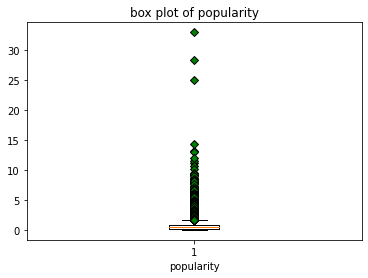

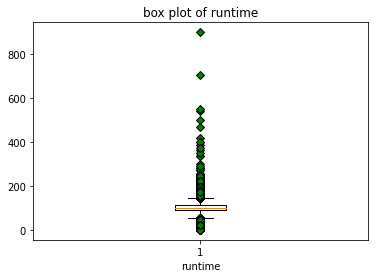

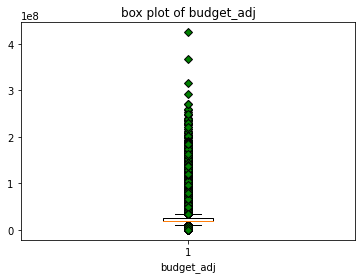

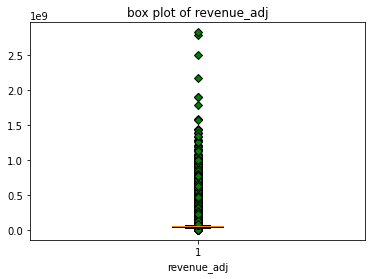

In [147]:
# Need to visualize the presence of the outliers using the box plot
numeric_columns=['popularity', 'runtime', 'budget_adj', 'revenue_adj']
green_diamond = dict(markerfacecolor='g', marker='D')
for col in numeric_columns:
  fig, ax = plt.subplots()
  ax.boxplot(df[col], flierprops=green_diamond)
  ax.set_title("box plot of " + col)
  ax.set_xlabel(col)

> for the outliers we can see that the revenue and budget have a wide intervale and we dont have to much data so we can't afford dropping those outliers.

> So we will deal with the popularity and runtime

In [148]:
#we define a function to find the outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [149]:
# Now we try to find the outliers for one columns to verify they match the statistics we saw when using the pandas describe() function
# which helps confirm we calculated the outliers correctly
outliers = find_outliers_IQR(df.runtime)

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))


number of outliers: 519
max outlier value: 900.0
min outlier value: 2.0


In [150]:
# We will just drop the outliers 
df = df.drop(index= find_outliers_IQR(df["popularity"]).index)
df = df.drop(index= find_outliers_IQR(df["runtime"]).index)

In [151]:
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,8051.000000,8051.000000,8051.000000,8051.000000,8.051000e+03,8.051000e+03
mean,0.483121,100.837097,5.902844,2000.159608,2.463574e+07,6.485850e+07
std,0.355184,14.295109,0.891060,12.931246,2.281901e+07,7.354172e+07
min,0.000188,59.000000,1.500000,1960.000000,9.210911e-01,2.861934e+00
25%,0.218070,90.000000,5.400000,1993.000000,1.982606e+07,4.015516e+07
50%,0.386180,99.000000,6.000000,2004.000000,1.982606e+07,5.900329e+07
75%,0.658450,110.000000,6.500000,2010.000000,1.982606e+07,5.900329e+07
max,1.624483,142.000000,8.900000,2015.000000,4.250000e+08,1.583050e+09


In [152]:
# Next, we create a new column to easaly manipulate the genres
df["new genres"] = df.genres.str.split('|')

In [153]:
# We create a profit columns
df["profit"] = df["revenue_adj"] - df["budget_adj"]

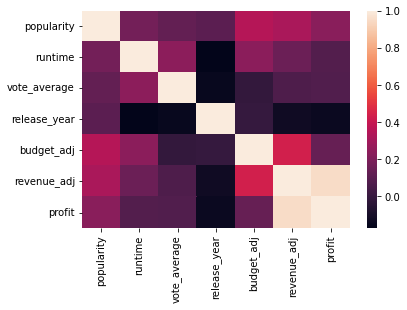

In [154]:
# And we just check the correlation of the column
sns.heatmap(df.corr())

> we conclude that there is coorelation between popularityand the budget, and the budget and revenue

<a id='eda'></a>
## Exploratory Data Analysis





> ### Which genres are most popular from year to year?

> #### Exploring the data

In [155]:
df.head()

,popularity,director,keywords,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,new genres,profit
104,1.532997,Doug Ellin,friendship|hollywood|movie star|entourage,104.0,Comedy,6.2,2015,2.759999e+07,4.532231e+07,[Comedy],1.772232e+07
105,1.510096,Jeremy Garelick,male friendship|impersonator|wedding|lying|bes...,101.0,Comedy,6.5,2015,2.115999e+07,7.341586e+07,[Comedy],5.225587e+07
106,1.499614,Christopher B. Landon,female nudity|shotgun|nudity|strip club|party,93.0,Comedy|Horror,6.2,2015,1.379999e+07,1.367190e+07,"[Comedy, Horror]",-1.280952e+05
107,1.495112,M. Night Shyamalan,rap|pennsylvania|brother sister relationship|f...,94.0,Horror|Thriller,5.9,2015,4.599998e+06,9.057402e+07,"[Horror, Thriller]",8.597402e+07
108,1.483246,Scott Cooper,boston|based on true story|organized crime,122.0,Crime|Drama,6.3,2015,4.875998e+07,9.179358e+07,"[Crime, Drama]",4.303360e+07


In [156]:
# First we checked the genres
df.genres.value_counts()

Drama                                         546
Comedy                                        536
Comedy|Drama                                  240
Drama|Romance                                 236
Horror|Thriller                               220
                                             ... 
Adventure|Science Fiction|Thriller|Mystery      1
Thriller|Comedy|Action                          1
Comedy|Fantasy|Thriller                         1
Comedy|Romance|Science Fiction|Drama            1
Mystery|Comedy                                  1
Name: genres, Length: 1629, dtype: int64

> #### Function definition

In [157]:
# Third we define two functions 
# getGenres_without_duplicates to get all the unique genres thar are in the dataset
def getGenres_without_duplicates(data):
    a = set()
    for i in data:
        for j in i:
            a.add(j)
    
    b = np.array(list(a))
    return b.reshape(b.shape[0], 1)

# The seconde function collecting_genres is to get all the genres (with duplicates) of an given data 
def collecting_genres(data):
    a = []
    for i in data:
        for j in i:
            a.append(j) 
    return a

> #### Creating additional dataframes

In [158]:
# Now we create a dataframe "s" that contains all the unique genres and a column called count
# this dataframe will be used to callculate the count of each genres in the selected year
# for example to count all the unique genres that appear in the films releases in 2015

#first we get all the unique genres in the dataset
data = getGenres_without_duplicates(df["new genres"])

#seconde we create a np array for the seconde column "count"
longeur = data.shape[0]
k = np.zeros((longeur, 1))

#and last, we create the dataframe
real_data = np.concatenate((data, k), axis=1)
s = pd.DataFrame(real_data, columns=["type", "count"])

#and we just change the type of count to float so that we can operate on it
s["count"] = s["count"].astype('float')
s

,type,count
0,Science Fiction,0.0
1,Western,0.0
2,Action,0.0
3,Fantasy,0.0
4,Drama,0.0
5,History,0.0
6,TV Movie,0.0
7,War,0.0
8,Mystery,0.0
9,Adventure,0.0


In [159]:
# Here we get all the unique years found in the dataset
years = df.release_year.value_counts().index
years

Int64Index([2014, 2013, 2009, 2012, 2008, 2011, 2015, 2007, 2006, 2010, 2005,
            2004, 2002, 2003, 2000, 2001, 1999, 1998, 1996, 1997, 1994, 1993,
            1995, 1988, 1990, 1992, 1991, 1986, 1989, 1987, 1984, 1985, 1980,
            1982, 1983, 1981, 1978, 1973, 1971, 1977, 1979, 1976, 1966, 1974,
            1975, 1972, 1964, 1967, 1970, 1968, 1963, 1965, 1960, 1961, 1962,
            1969],
           dtype='int64')

In [160]:
# just as the "s" table here we create a "best_genres_perYear" dataframe to store the best genres in each year

#first we sort the years from the "years" table
years_sorted = np.array(years.sort_values())
years_sorted = years_sorted.reshape(years_sorted.shape[0], 1)

#seconde we create a np array for the seconde column "genres"
k = np.zeros((len(years), 1))

#and last, we create the dataframe
real_data = np.concatenate((years_sorted, k), axis=1)
best_genres_perYear = pd.DataFrame(real_data, columns=["year", "genres"])
best_genres_perYear

,year,genres
0,1960.0,0.0
1,1961.0,0.0
2,1962.0,0.0
3,1963.0,0.0
4,1964.0,0.0
5,1965.0,0.0
6,1966.0,0.0
7,1967.0,0.0
8,1968.0,0.0
9,1969.0,0.0


> #### Finding the best genres of each year

In [161]:
# Here is where all the magic happens

# We start by initializing a variable "final_genres" which will hold the best geners of the selected year
final_genres=""

#  And then we iterate for each year in the "years" dataframe
for i in years:
  
  # Firstly, we select the data of the selected year "i" from our dataset 
  selected_data = df[df.release_year == i]
  # Next we get the list with all of the genres of that year (with duplicates) using the defined function "collecting_genres"
  genre_list = collecting_genres(selected_data["new genres"])
  
  # Now, we update the count in the "s" dataframe for each genre
  for j in genre_list:
    s.loc[s["type"] == j , "count"] += 1

  # After that, we find the max count in the "s" dataframe to identify the best genres
  best_genre_count = s["count"].max()
  # And we fetch those best genres from the "s" dataframe
  bests = s[s["count"] == best_genre_count]["type"]
  
  # Here we concatinate the best genres in one variable "final_genres"
  for l in bests:
   final_genres = final_genres + " " + l 
  
  # Lastly, we update the dataframe "best_genres_perYear"
  best_genres_perYear.loc[best_genres_perYear.year == i, "genres"] = final_genres

  # At the end we empty the "final_genres" string 
  final_genres=""
  # And we empty the count column of the "s" dataframe for the next iteration
  s["count"] = np.zeros(s.shape[0])

best_genres_perYear

,year,genres
0,1960.0,Drama Comedy
1,1961.0,Drama
2,1962.0,Drama
3,1963.0,Comedy
4,1964.0,Drama
5,1965.0,Drama
6,1966.0,Comedy
7,1967.0,Drama
8,1968.0,Drama
9,1969.0,Drama


> From the dataframe above we can see each year with it respective best genres of the year

> ### What kinds of properties are associated with movies that have high profit?

In [162]:
# Now we slice the data into to categories "profitable" and "non_profitable"
profitable = df[df["profit"]  > 0]
non_profitable = df[df["profit"]  <= 0]

print(profitable.shape)
print(non_profitable.shape)

(6532, 11)
(1519, 11)


In [163]:
# we see what numerical columns to use
numerical = df.select_dtypes(include='number').columns
numerical

Index(['popularity', 'runtime', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit'],
      dtype='object')

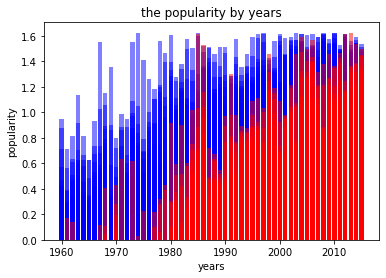

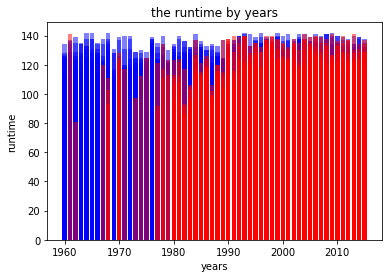

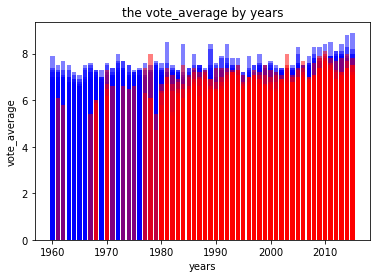

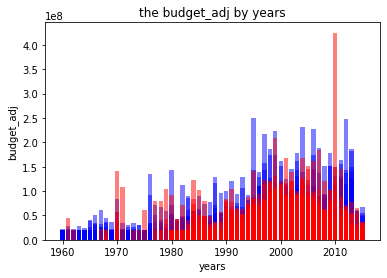

In [164]:
# We draw box plot of selected columns by years
invastigate = ['popularity', 'runtime', 'vote_average', 'budget_adj']
for col in invastigate:
  fig, ax = plt.subplots()
  ax.bar(profitable.release_year, profitable[col], color="blue", alpha=0.5)
  ax.bar(non_profitable.release_year, non_profitable[col], color="red", alpha=0.5)
  ax.set_xlabel("years")
  ax.set_ylabel(col)
  ax.set_title("the " + col + " by years")
  

> We arrive to the conclusion that : <ul> <li>the most profitable films are popular</li> <li>the non profitable films have lower budget than the profitable movies</li> <li>the runtime is high in the nonprofitable film (after the year 1970 in the plot because of a short dataset)</li> <li>the votes are higher for the profitable movies</li>
we can tell that popularity, budget, vote_average play a role in the profitability of the film



> ### Are movie with higher budget profitable?

In [165]:
# here we get the average budget for the profitable and non_profitable movies
mean_profitable_budget = profitable.budget_adj.mean()
mean_non_profitable_budget = non_profitable.budget_adj.mean()

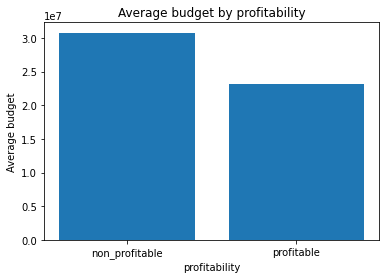

In [166]:
# Create a bar chart to see the results
locs = [1, 2]
heights = [mean_non_profitable_budget, mean_profitable_budget]
labels = ['non_profitable', 'profitable']
plt.bar(locs, heights, tick_label=labels)
plt.title('Average budget by profitability')
plt.xlabel('profitability')
plt.ylabel('Average budget');

> we conclude that the non-profitable movies have higher average budgets

> ### Do movie with higher budget recieve better ratting?

In [170]:
# here we need to find the mediane (middle budget)
middle = df.budget_adj.median()

# and then we split to two dataframes "low_budget" and "high_budget"
low_budget = df[df.budget_adj < middle]
high_budget = df[df.budget_adj >= middle]

# and then we calculate the average vote for the two dataframes
mean_low_vote = low_budget.vote_average.mean()
mean_high_vote = high_budget.vote_average.mean()

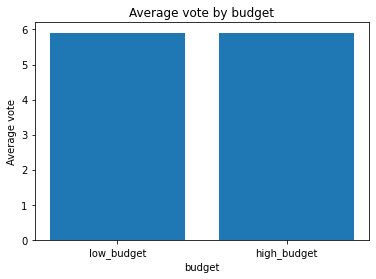

In [171]:
# Create a bar chart to see the results
locs = [1, 2]
heights = [mean_low_vote, mean_high_vote]
labels = ['low_budget', 'high_budget']
plt.bar(locs, heights, tick_label=labels)
plt.title('Average vote by budget')
plt.xlabel('budget')
plt.ylabel('Average vote');

we see that movies with higher budget recieves an average rating almost equal to movies with low budget

<a id='conclusions'></a>
## Conclusions

> During this analysis of this dataset we have arrived to a better understanding of what makes a movie have a high chance of it being profitable. here we present our findings:
<ul>
<li>
As we saw in our first question (Which genres are most popular from year to year?) that the drama genres is present as the most popular genre from year to year</li>
<li>for the seconde question (What kinds of properties are associated with movies that have high revenues?) we found that usally movies with higher runtime are non_profitable, votes and popularity of the movies indicates its profitability and profitable movie usually have a higher budget</li>
<li>in the third question (Are movie with higher budget profitable?) we found that no, a higher budget doesn't mean the movie will be profitable.
</li>
<li>Do movie with higher budget recieve better rating? we saw that the movies with higher budget recieve the same rating as the low budget ones on average</li>
</ul>

> to summarize our findings, if you want a profitable movie we need to create a drama movie with a high budget and a small runtime (this is the secret formula that we arrived to)

> In this analysis we faced some limitation which are:
<ul>
<li>The missing data (in the form of Nan values or 0.0</li>
<li> the dataset isn't diverse enough in the genres(almost every movie is in the drama genre)
<li>the size of the dataset (10866) isn't enough to find the ultimate secret formula to produce a garantied profitable movie 